# Unsupervised Learning
<span style="font-size: 12px;">By: Marisol Hernandez</span>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Introduction to Unsupervised Learning
**Unsupervised learning** is a type of machine learning where the model is trained on data *<u>without</u>* the guidance of a target variable or any prior responses. Unlike supervised learning, where the model learns from input-output pairs, unsupervised learning finds hidden patterns or intrinsic structures in the input data. 

The main objective of unsupervised learning is to explore the inherent structure of the data and extract valuable information *<u>without</u>* the model having prior knowledge of the categories or relationships between variables.

### 1.1 Two Types of Unsupervised Learning

1. **Clustering**: A technique used to group a set of objects in such a way that objects in the same group (called a **cluster**) are more similar to each other than to those in other groups (clusters). Clustering is often used to find natural groupings in data, allowing for insights into the inherent structure of the data without requiring predefined labels.

<p align="center">
  <img src="imgs/unsupervised_learning1.png" alt="Alt text" width="850" height="350">
</p>

*Note: The similarity can be based on various criteria, such as distance, density, or connectivity.*

2. **Dimensionality Reduction**: Involves reducing the number of features or variables in the dataset without losing important information. It simplifies the dataset while retaining as much information as possible. These techniques allow the data to be represented in a lower-dimensional space, facilitating the visualization and understanding of the data structure.
<p align="center">
  <img src="imgs/unsupervised_learning2.png" alt="Alt text" width="850" height="450">
</p>

### 1.3 Applications
Unsupervised learning has a wide range of applications across various domains. Here are some notable examples:

1. **Customer Segmentation**:

    - **Description**: Grouping customers based on purchasing behavior, demographics, or other attributes.

    - **Application**: Helps businesses tailor marketing strategies and personalize customer experiences.

2. **Anomaly Detection**:

    - **Description**: Identifying unusual data points that do not fit the general pattern.

    - **Application**: Used in fraud detection, network security, and fault detection in manufacturing.

3. **Document Clustering**:

    - **Description**: Grouping similar documents based on their content.

    - **Application**: Used in organizing large collections of documents, improving search engines, and topic modeling.

As you can see, unsupervised learning is a powerful tool for exploring and understanding the intrinsic structure of data without the need for known labels or answers.

## 2. Clustering
**Clustering** is a type of unsupervised learning that involves grouping a set of objects in such a way that objects within the same group, or cluster, are more similar to each other than to those in other clusters. The primary goal of clustering is to discover natural groupings within data, which can help in identifying patterns, simplifying data, and making better data-driven decisions.

### 2.1 Common Clustering Algorithms
1. **K-Means Clustering**: One of the most popular and straightforward clustering algorithms. It partitions the dataset into $k$ distinct, non-overlapping clusters based on a set number of clusters ($k$) specified beforehand.

2. **Hierarchical Clustering**: Builds a tree-like structure (dendrogram) to represent nested groupings of the data points. It can be divided into two types: agglomerative (bottom-up) and divisive (top-down).

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: A density-based clustering algorithm that can find clusters of arbitrary shape and identify outliers (noise). It groups together points that are closely packed and marks points that are in low-density regions as outliers.

### 2.2 K-Means Clustering
**Description**: The K-Means algorithm is a clustering technique that aims to divide a dataset into `k` clusters (defined as input parameter), so that points within each cluster are similar to each other and different from points in other clusters.

**Definition**: The algorithm works by initializing `k` centroids randomly, then iteratively refining these centroids to minimize the within-cluster sum of squares (WCSS). Each data point is assigned to the nearest centroid, and the centroids are recalculated as the mean of all points in the cluster. This process repeats until the centroids stabilize.

#### Steps
It's an iterative process composed of several steps,

1. **Initialization**: Choose `k` initial centroids. These centroids can be randomly selected from the data points or predetermined. These centroids are representative points that will serve as the initial centers of each `k` cluster.

2. **Assignment of Points to Clusters**: Each data point is assigned to the nearest centroid based on the Euclidean distance (or another distance metric). This step forms `k` clusters where each point is grouped with the nearest centroid.

3. **Centroid Update**: For each cluster, calculate the new centroid by taking the mean of all data points assigned to that cluster. The new centroid becomes the arithmetic average of the coordinates of the points within the cluster.

4. **Iteration**: Repeat the assignment and update steps iteratively. After updating the centroids, reassign each data point to the nearest centroid, and then update the centroids again. Continue this process until the centroids no longer change significantly or a predefined number of iterations is reached.

5. **Result**: The algorithm converges when the centroids stabilize, meaning their positions do not change significantly between iterations. The final result is a partition of the data into `k` clusters, with each point assigned to the cluster with the nearest centroid, and the centroids representing the center of each cluster.

<center>
<img src="imgs/unsupervised_learning3.gif" alt="Unsupervised Learning">
</center>

#### Objective Function
The objective of K-Means is to minimize the within-cluster sum of squares (WCSS), also known as inertia:

$$\text{WCSS} = \sum_{i=1}^k\sum_{x_j\in C_i}||x_j - \mu_i||^2$$

where,

- $k$ is the number of clusters

- $C_i$ is the set of points in cluster $i$

- $x_j$ is a data point

- $\mu_i$ is the centroid of cluster $i$

#### Elbow Method for Finding the Optimal `k` Value
Selecting the right number of clusters can be challenging. One method to find the optimal number of clusters ($k$) in K-Means Clustering is the **Elbow Method**.

**Definition**: A technique used to determine the optimal number of clusters in a dataset. This method is a visual technique used to determine the best K value for a k-means clustering algorithm. In this method, a graph known as the elbow graph plots the within-cluster-sum-of-square (WCSS) values against various K values. The optimal K value is identified at the point where the graph bends like an *elbow*.

##### Example
In the following plot, we are actually varying the number of clusters $k$ from 1-10, For each value of $k$, the WCSS (Within-Cluster Sum of Square) is calculated. **WCSS** is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the $k$ value, the plot looks like an *Elbow*.

As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis.

The $k$ value corresponding to this point is the optimal value of K or an optimal number of clusters.

<p align="center">
  <img src="imgs/unsupervised_learning4.png" alt="Alt text" width="450" height="300">
</p>

We'll implement this method in Python.

#### Python Implementation
In this cell, we generate a synthetic dataset to simulate customer segmentation. The dataset consists of 300 samples with two features:

1. `Annual Income (k$)`

2. `Spending Score (1-100)`

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples and centers
n_samples = 300
centers = [(60, 60), (80, 20), (40, 80), (100, 40)]

# Generate synthetic data
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=8, random_state=42)

# Ensure all values are positive and within realistic ranges
X[:, 0] = np.clip(X[:, 0], 30, 120)  # Annual Income in thousands of dollars
X[:, 1] = np.clip(X[:, 1], 1, 100)   # Spending Score (1-100)

# Create a DataFrame for better readability
df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df

,Annual Income (k$),Spending Score (1-100)
0,70.469572,25.252429
1,55.644938,60.887381
2,40.962365,84.115511
3,72.147931,23.696828
4,80.465670,10.856238
...,...,...
295,74.277570,25.436782
296,73.225650,7.881222
297,83.550555,26.197072
298,36.231694,81.856399


We can visualize the generated synthetic data by plotting `Annual Income (k$)` against `Spending Score (1-100)`. Each point represents a customer, and the plot provides a visual overview of the customer distribution and potential clusters.

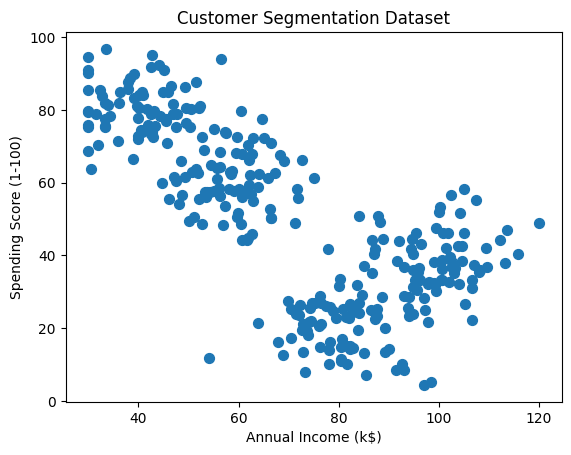

In [3]:
x = X[:, 0]
y = X[:, 1]

# Plot the data
plt.scatter(x, y, s=50)
plt.title('Customer Segmentation Dataset')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

We then apply the Elbow Method to determine the optimal number of clusters for K-Means clustering. We compute the Within-Cluster Sum of Squares (WCSS) for $k$ values ranging from 1 to 10 and plot WCSS against the number of clusters. The "elbow" point in the plot indicates the optimal $k$ value where adding more clusters doesn't significantly reduce WCSS.

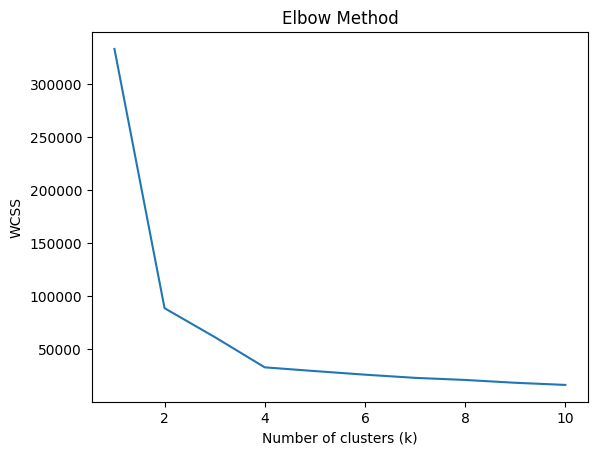

In [4]:
# Compute WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

We can see that the elbow appears to be at $k = 4$. So we'll apply KMeans with 4 clusters.

Based on the Elbow Method's result, we apply K-Means clustering with the optimal number of clusters ($k=4$). The K-Means model is trained on the synthetic customer data.

In [5]:
# Apply K-Means with 4 clusters
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

We can visualize the results of the K-Means clustering. Each customer is colored according to its assigned cluster, and the centroids of the clusters are marked with red 'X' symbols. This visualization helps to understand how customers are segmented based on their annual income and spending score, providing insights into distinct customer groups.

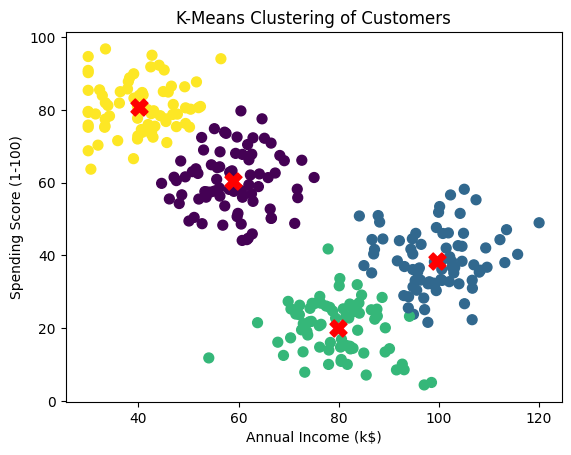

In [6]:
# Get the labels generated from the model
labels = model.labels_

# Plot the clusters
plt.scatter(x, y, c=labels, s=50, cmap='viridis')

# Plot the centroids of each cluster
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=150, c='red', marker='X')

plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Note: Once we have trained the model, we can get the labels of which cluster is associated with each point with the `labels_` attribute of the model (`model.labels_`). We can also obtain the coordinates of the centroids of each cluster with the `cluster_centers_` attribute of the model (`model.cluster_centers_`).

### 2.3 Hierarchical Clustering
**Description**: Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Unlike K-Means, which partitions the data into $k$ lusters, hierarchical clustering builds a tree-like structure called a dendrogram that represents nested groupings of data points and their similarities.

**Definition**: Hierarchical clustering is a clustering technique that seeks to build a hierarchy of clusters represented as a tree structure called a dendrogram.

#### Two Types
This approach can be divided into two types,

1. **Agglomerative (bottom-up)**: Starts with each data point as an individual cluster and iteratively merges the closest pairs of clusters until all points are contained in a single cluster or the desired number of clusters is reached. It is called *"bottom-up"* because it begins with individual elements and combines them into larger clusters.

2. **Divisive (top-down)**: Starts with all data points in a single cluster and recursively splits the cluster into smaller clusters until each data point is in its own cluster or the desired number of clusters is achieved. It is called *"top-down"* because it begins with a large cluster and divides it into smaller clusters.

<p align="center">
  <img src="imgs/unsupervised_learning5.png" alt="Alt text" width="600" height="300">
</p>

#### Steps
It's an iterative process composed of several steps,

1. **Initialization**: Start with each data point as its own cluster. In the case of agglomerative clustering, this means you have as many clusters as data points.

2. **Similarity Calculation**: Calculate the similarity or distance between every pair of clusters. Common distance measures include Euclidean distance, Manhattan distance, and cosine similarity.

3. **Cluster Union**: Identify the two clusters that are closest to each other based on the chosen distance metric and merge them into a single cluster. This reduces the total number of clusters by one.

4. **Similarity Matrix Update**: Update the similarity matrix to reflect the distances between the new cluster and all other clusters. This step ensures that the merging process can continue correctly.

5. **Iteration**: Repeat the similarity calculation, cluster union, and similarity matrix update steps until only a single cluster remains (agglomerative) or the desired number of clusters is achieved. This iterative process builds the hierarchical structure.

6. **Dendrogram**: Construct a dendrogram to visualize the hierarchy of clusters. The dendrogram illustrates the order in which clusters were merged (or split) and the distances at which these mergers occurred. It is a useful tool for deciding the number of clusters by cutting the tree at a certain height.

<center>
<img src="imgs/unsupervised_learning6.gif" alt="Unsupervised Learning">
</center>

Hierarchical clustering is useful when the optimal number of clusters is not known in advance or when it is desired to explore the hierarchical structure of the data. However, it can be computationally expensive on large data sets due to the need to calculate all the distances between data points.

#### Python Implementation
In this example, we generate a smaller synthetic dataset (10 samples) to simulate customer segmentation using hierarchical clustering.

In [7]:
# Define the number of samples and centers
n_samples = 10
centers = [(60, 60), (80, 20), (40, 80)]

# Generate synthetic data
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=8, random_state=42)

# Ensure all values are positive and within realistic ranges
X[:, 0] = np.clip(X[:, 0], 30, 120)  # Annual Income in thousands of dollars
X[:, 1] = np.clip(X[:, 1], 1, 100)   # Spending Score (1-100)

# Create a DataFrame for better readability
df = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df

,Annual Income (k$),Spending Score (1-100)
0,65.181508,72.184239
1,31.897351,82.513979
2,30.000000,75.501700
3,76.292658,16.274162
4,76.244205,24.340480
5,32.735807,68.701570
6,63.973713,58.893886
7,72.633703,66.139478
8,81.935698,4.693758
9,58.126773,58.126904


We can visualize the generated synthetic data by plotting `Annual Income (k$)` against `Spending Score (1-100)`. Each point represents a customer, and the plot provides a visual overview of the customer distribution and potential clusters.

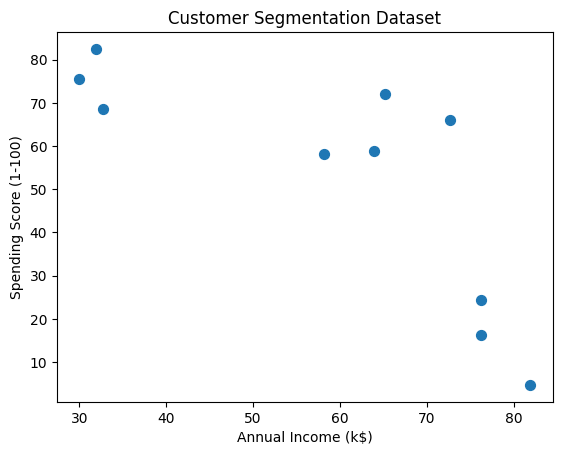

In [8]:
x = X[:, 0]
y = X[:, 1]

# Plot the data
plt.scatter(x, y, s=50)
plt.title('Customer Segmentation Dataset')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

We perform hierarchical clustering on the synthetic dataset and plot the dendrogram,

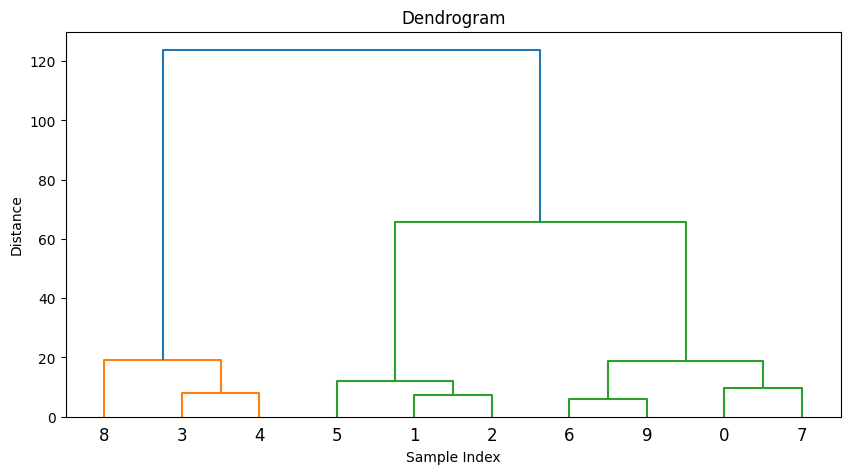

In [9]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## 3. Dimensionality Reduction
**Dimensionality reduction** is a technique used to reduce the number of features or variables in a dataset. This process simplifies the data, making it easier to visualize, understand, and work with, without significantly compromising the performance or accuracy of the model while also retaining as much relevant information as possible.

In many data sets, especially those with many features, there may be redundancy or correlation between variables, which can make analysis and visualization difficult. **Dimensionality reduction** addresses this problem by transforming the original data into a lower-dimensional space, where the new variables (called principal components or latent features) represent a combination of the original variables.

### 3.1 Two Types of Dimensionality Reduction
There are two main approaches to dimensionality reduction:

1. **Principal Component Analysis (PCA)**:  Is a linear technique that finds the directions of maximum variance in the data and projects the original data into a lower-dimensional space defined by the **principal components**. This transformation converts the original set of correlated variables into a set of linearly uncorrelated variables known as the **principal components**. These **principal components** retain most of the variation in the original data while reducing dimensionality.

<p align="center">
  <img src="imgs/unsupervised_learning2.png" alt="Alt text" width="850" height="450">
</p>

2. **Singular Value Decomposition (SVD)**: Is a technique that breaks down a matrix into three smaller matrices: one representing the data in terms of its singular values and two orthogonal matrices. SVD is used to identify and eliminate less important components of the data, facilitating dimensionality reduction while preserving essential structures and relationships.

<p align="center">
  <img src="imgs/unsupervised_learning7.png" alt="Alt text" width="650" height="350">
</p7

### 3.2 Reasons for Dimensionality Reduction
1. **Data simplification and visualization**: Reducing the number of dimensions simplifies complex data, making it easier to visualize and interpret. For example, plotting high-dimensional data on a 2D or 3D graph allows for better comprehension of patterns, clusters, and relationships within the data.

2. **Noise reduction**: Dimensionality reduction can help eliminate noise and irrelevant features that may obscure the true signals in the data. By focusing on the most significant features, the process enhances the signal-to-noise ratio, leading to improved model performance and more reliable insights.

3. **Computational efficiency**: High-dimensional data can be computationally expensive and time-consuming to process. Dimensionality reduction techniques decrease the number of features, reducing the computational burden and speeding up the training and inference times of machine learning algorithms.

4. **Regularization**: By reducing the number of features, dimensionality reduction helps prevent overfitting, which occurs when a model learns the noise in the training data rather than the underlying pattern. This regularization effect leads to models that generalize better to new, unseen data.

5. **Feature exploration and selection**: Dimensionality reduction aids in identifying the most relevant features for a given task. It allows for exploration and selection of key features that contribute the most to the variance in the data, enhancing the interpretability and performance of the models.

6. **Data preprocessing**: Dimensionality reduction is often a crucial step in the data preprocessing pipeline. It prepares the data for further analysis or modeling by reducing complexity, improving data quality, and ensuring that subsequent machine learning algorithms operate on a more manageable and informative dataset.

### 3.3 PCA

**PCA** is a dimensionality reduction technique that seeks to transform an original data set with multiple features (dimensions) into a new data set with fewer features while preserving most of the important information.

Imagine that we have a dataset with many characteristics, such as height, weight, age, income and education level of different people. Each person represents a point in a high-dimensional space, where each feature is a dimension. PCA allows us to find new directions or axes in this high-dimensional space, known as principal components. These directions represent the linear combinations of the original characteristics that explain most of the variability in the data. The first principal component captures the largest possible variability in the data set, the second principal component captures the next largest variability, and so on.

When using **PCA**, we can choose how many principal components we wish to keep. If we choose to keep only a few of them, we will reduce the number of features and thus the dimensionality of the data set. This can be especially useful when there are many features and we want to simplify the interpretation and analysis of the data.

#### Python Implementation

In [33]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

pd.DataFrame(data=X, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


The features are standardized using `StandardScaler` to have mean 0 and variance 1, which is important for PCA.

In [28]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pd.DataFrame(data=X_std, columns=["sepal length (scaled)", "sepal width (scaled)", "petal length (scaled)", "petal width (scaled)"])

,sepal length (scaled),sepal width (scaled),petal length (scaled),petal width (scaled)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


The `PCA` class from `sklearn.decomposition` is used to reduce the dimensionality of the data to 2 components.

In [29]:
# Perform PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)

A scatter plot is created to visualize the data in the new 2D space defined by the first two principal components. Different colors are used to represent different classes in the iris dataset.

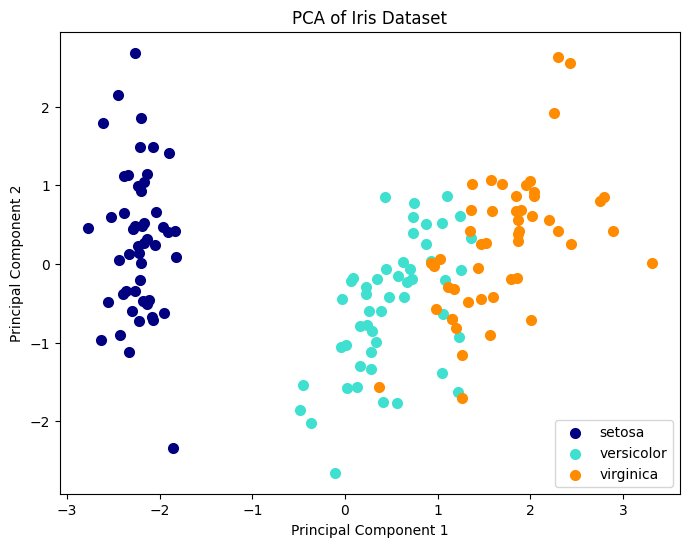

In [30]:
# Plot the results
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
for color, target, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, lw=2, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()